In [1]:
import requests

import numpy as np
import matplotlib.pyplot as plt
import gif

In [2]:
requests.get('http://127.0.0.1:8001/status').json()

{'status': 'OK'}

In [3]:
requests.get('http://127.0.0.1:8001/experiment').json()

[{'experiment_id': 'd1a93f4c-c721-4273-b9fa-07fe9a7fe8ad'},
 {'experiment_id': 'b4c14741-fbad-4f73-beb3-7eff4e97cd58'},
 {'experiment_id': '57ab1e79-e634-43eb-817b-918680a68b6b'},
 {'experiment_id': '3a2064f5-8503-4fbf-b045-1e72aae8d744'},
 {'experiment_id': '72b7afd5-5e4c-48ab-89f1-b60133e2b584'},
 {'experiment_id': '61c2df70-1d15-4f9a-9271-39ff00bb0d06'},
 {'experiment_id': 'f95dedef-8be5-4c53-80cc-f6d0aac4441b'},
 {'experiment_id': '95a04ab1-01e2-40c4-a3c2-8c57b310cc5c'},
 {'experiment_id': 'e3a992f5-2819-49bd-bedb-d4cfa7845057'},
 {'experiment_id': '1378c0a5-57b8-49c4-b443-a5b91e7e066a'},
 {'experiment_id': '4b20a6aa-1726-488e-b63b-79ff8d7279d6'},
 {'experiment_id': '8562d2f7-9170-4235-a2de-602dca79bb56'},
 {'experiment_id': '9142de47-4376-4a0c-9bd2-544a0f0d5494'},
 {'experiment_id': 'b0771afc-9eea-4c26-83cc-693a49af73eb'}]

In [4]:
test_data = {
    'a': {'type': 'log', 'parameters': dict(lower=0.01, upper=1.0)},
}
new_experiment = requests.post('http://127.0.0.1:8001/experiment', json=test_data).json()
new_experiment_id = new_experiment['experiment_id']
new_experiment_id

'9b2ad6e5-690c-4892-a0c2-ee6045d824a0'

In [5]:
requests.get(f'http://127.0.0.1:8001/experiment/41444{new_experiment_id}').json()

{'status': 'Experiment with such ID not Found'}

In [6]:
requests.get(f'http://127.0.0.1:8001/experiment/{new_experiment_id}/ask').json()

{'a': 0.1}

In [7]:
requests.get(f'http://127.0.0.1:8001/experiment/{new_experiment_id}').json()

{'n evaluated points': 0, 'recommended point': {'a': 0.10000000000000002}}

In [8]:
requests.delete(f'http://127.0.0.1:8001/experiment/{new_experiment_id}').json()

{'status': 'OK'}

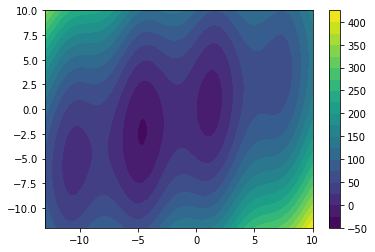

In [9]:
def f(a, b):
    return a**2 + b**2 - a*b - 20*np.sin(a) + 5*a

a = np.linspace(-13, 10, 100)
b = np.linspace(-12, 10, 100)

x, y = np.meshgrid(a, b)

z = f(x, y)

plt.contourf(x, y, z, levels=20)
plt.colorbar()

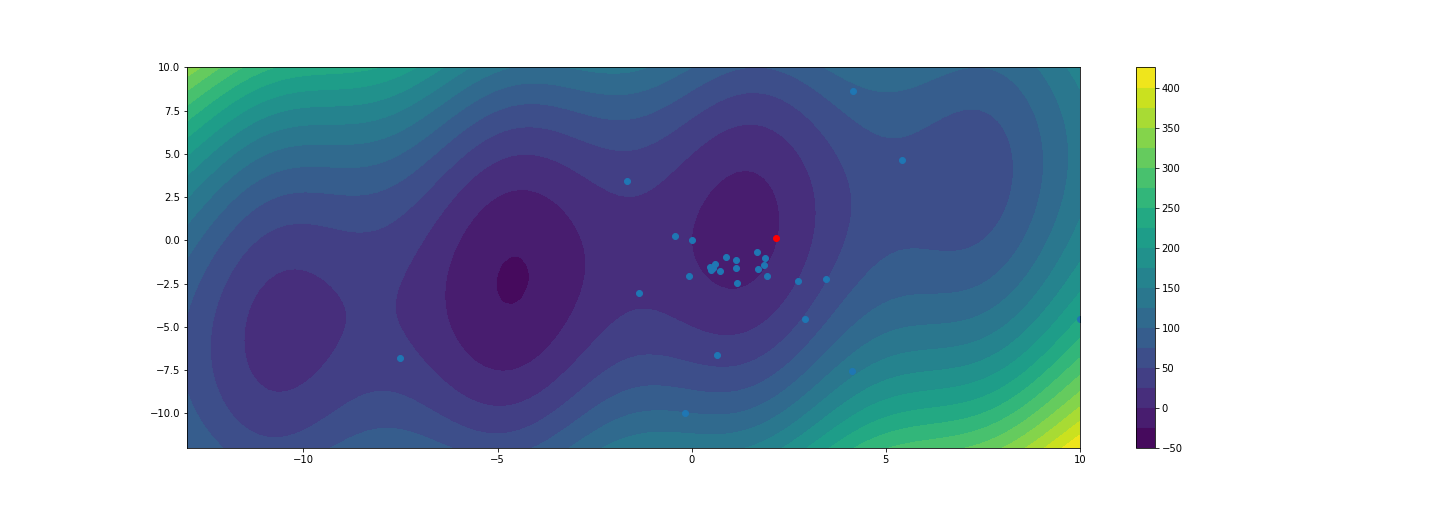

{'a': 2.183342437306158, 'b': 0.14734500100913872}
-0.9800332353075341
{'status': 'OK'}


In [10]:
from IPython.display import clear_output
test_data = {
    'a': {'type': 'scalar', 'parameters': dict(lower=-10, upper=10)},
    'b': {'type': 'scalar', 'parameters': dict(lower=-10, upper=10)},
}
new_experiment = requests.post('http://127.0.0.1:8001/experiment', json=test_data).json()
new_experiment_id = new_experiment['experiment_id']
new_experiment_id

@gif.frame
def get_frame(asked):
    plt.figure(figsize=(20, 7))
    plt.contourf(x, y, z, levels=20)
    plt.colorbar()
    plt.scatter(*np.array(asked)[:, :-1])
    plt.scatter(*np.array(asked)[:, -1], color='red')
    
frames = []
asked = [[], []]
for i in range(30):
    clear_output(wait=True)
    asked_point = requests.get(f'http://127.0.0.1:8001/experiment/{new_experiment_id}/ask').json()
    asked[0].append(asked_point['a'])
    asked[1].append(asked_point['b'])
    
    frames.append(get_frame(asked))
    plt.figure(figsize=(20, 7))
    plt.axes([0,0,1,1])
    plt.imshow(frames[-1])
    plt.axis('off')
    plt.show()
    
    print(asked_point)
    f_a = f(**asked_point)
    print(f_a)
    tell_info = {
        'point': asked_point,
        'value': f_a
    }
    tell_resp = requests.post(f'http://127.0.0.1:8001/experiment/{new_experiment_id}/tell', json=tell_info).json()
    print(tell_resp)
gif.save(frames, "example.gif", duration=200)

![SegmentLocal](example.gif "example")

In [11]:
status = requests.get(f'http://127.0.0.1:8001/experiment/{new_experiment_id}').json()
status

{'n evaluated points': 30,
 'recommended point': {'a': 1.1408328846868454, 'b': -1.11586298470232}}

In [12]:
f(**status['recommended point'])

-8.655792297105405